### Score and cross-validated scores 

In [1]:
from sklearn import datasets, svm

In [2]:
digits = datasets.load_digits()

In [3]:
X_digits = digits.data
y_digits = digits.target

In [4]:
svc = svm.SVC(C=1, kernel= 'linear')

In [5]:
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

In [6]:
# k_fold and cross_val_score
from sklearn.model_selection import KFold, cross_val_score

In [7]:
X = ['a','a','b','c','c','c']

In [8]:
k_fold = KFold(n_splits=3)

In [9]:
for train_indices, test_indices in k_fold.split(X):
    print('Train: %s| test: %s ' % (train_indices, test_indices))


Train: [2 3 4 5]| test: [0 1] 
Train: [0 1 4 5]| test: [2 3] 
Train: [0 1 2 3]| test: [4 5] 


In [12]:
#简单步骤
k_fold = KFold(n_splits=3)
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]) for train, test in
k_fold.split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [15]:
#也可以用cross_val_score 算出来
cross_val_score(svc, X_digits, y_digits, cv =k_fold, n_jobs=-1)

array([ 0.93489149,  0.95659432,  0.93989983])

In [16]:
#plot a relationship between score and SVC parameter C

In [17]:
import numpy as np
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10,0,10)

In [18]:
scores = list()
scores_std = list()

In [20]:
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X_digits, y_digits, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

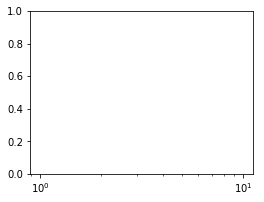

In [31]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, np.array(scores))
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

### Grid-search and cross-validated estimators 

In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [33]:
C_s = np.logspace(-6,-1,10)

In [34]:
clf = GridSearchCV(estimator=svc, param_grid=dict(C=C_s), n_jobs=-1)

In [35]:
clf.fit(X_digits[:1000], y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [36]:
clf.best_score_

0.92500000000000004

In [37]:
clf.best_estimator_

SVC(C=0.0077426368268112772, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
clf.score(X_digits[1000:], y_digits[1000:])

0.94353826850690092

In [39]:
#Cross-validated estimators

In [40]:
from sklearn import linear_model,datasets

In [41]:
lasso = linear_model.LassoCV()

In [42]:
diabetes = datasets.load_diabetes()

In [43]:
X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [44]:
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [45]:
lasso.alpha_

0.012291895087486173

In [ ]:
#exercise:
# http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py